In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
!pip install sklearn

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

In [ ]:
data1 = pd.read_csv('/gdrive/My Drive/DS_contest/Finaldata1.csv')

In [ ]:
data1 = data1.drop('No', axis = 1)
data1 = data1.drop('Unnamed: 0', axis = 1)

In [ ]:
data1 = data1.drop('Avg Fluid Pumped / Meter (m3)', axis = 1)
data1 = data1.drop('Avg Proppant Placed per Stage (tonne)', axis = 1)
data1 = data1.drop('SF_oil', axis = 1)
data1 = data1.drop('SF_slickwater', axis = 1)
data1 = data1.drop('Stages Actual', axis = 1)
data1 = data1.drop('Total Ceramic Proppant Placed (tonne)', axis = 1)

In [ ]:
feature_columns = list(data1.columns.difference(['Y_first6']))

In [ ]:
def plot_feature_importance(importance,names,model_type):

  feature_importance = np.array(importance)
  feature_names = np.array(names)


  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  plt.figure(figsize=(10,8))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
from sklearn.metrics import make_scorer

def sMAPE(actual_values, predicted_values, expsMAPE = False):
  '''
  logY를 regression하는 경우에 expsMAPE = True로 입력, 아니면 expsMAPE = False로 놔두면 됨
  reg_sMAPE = GridSearchCV(RandomForestRegressor(), {}, scoring=make_scorer(sMAPE, greater_is_better=False)) 이런식으로 쓰면됨
  reg
  '''
  if expsMAPE == True:
    predicted_values = np.exp(predicted_values)
    actual_values = np.exp(actual_values)
  return 1/len(actual_values) * np.sum(2*np.abs(actual_values - predicted_values) / (np.abs(actual_values) + np.abs(predicted_values)) * 100)

In [ ]:
def expsMAPE(actual_values, predicted_values, expsMAPE = True):
  predicted_values = np.exp(predicted_values)
  actual_values = np.exp(actual_values)
  return 1/len(actual_values) * np.sum(2*np.abs(actual_values - predicted_values) / (np.abs(actual_values) + np.abs(predicted_values)) * 100)

# **XG boost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
X = data1[feature_columns]
y = data1['Y_first6']

In [ ]:
params = {
    'n_estimators': list(range(10, 40)),
    'learning_rate': np.arange(0.1, 0.4, 0.01)
}
reg_sMAPE = GridSearchCV(XGBRegressor(), param_grid=params, cv=5, scoring=make_scorer(sMAPE, greater_is_better=False))
reg_sMAPE.fit(X, y)

[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]),
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29, 30, 31, 32, 33, 34, 35, 36,
                                          37, 38, 39]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [ ]:
reg_sMAPE.best_params_

{'learning_rate': 0.1, 'n_estimators': 25}

In [ ]:
model1 = XGBRegressor(n_estimators = 25, learning_rate = 0.1).fit(X, y)
y_pred = model1.predict(X)
print(sMAPE(y, y_pred, False))

[15:39:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
28.027058036096577


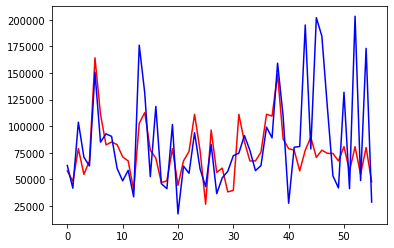

In [ ]:
index_list = np.arange(len(y_pred))
plt.plot(index_list, y_pred, '-', c='r', label = 'predict')
plt.plot(index_list, test_y, '-', c='b', label = 'real')

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
my_model1 = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
my_model1.fit(train_x,train_y)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=0)

In [ ]:
score_list = []
for i in range(1, 101):
  my_model1 = RandomForestClassifier(n_estimators=i, max_depth=5,random_state=0)
  my_model1.fit(train_x,train_y)
  y_pred = my_model1.predict(test_x)
  kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
  scores = cross_val_score(my_model1, X, y, scoring = 'r2', cv=kfold)
  scores_mean = sum(scores)/5
  score_list.append((i, scores_mean))

In [ ]:
num1 = score_list[0][1]
num0 = score_list[0][0]
for i in score_list:
  if i[1] > num1:
    num1 = i[1]
    num0 = i[0]
  else:
    continue

print(num0)
print(num1)

22
-0.03332061304019931


In [ ]:
score_list = []
for i in range(1, 11):
  my_model1 = RandomForestClassifier(n_estimators=22, max_depth=i,random_state=0)
  my_model1.fit(train_x,train_y)
  y_pred = my_model1.predict(test_x)
  kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
  scores = cross_val_score(my_model1, X, y, scoring = 'r2', cv=kfold)
  scores_mean = sum(scores)/5
  score_list.append((i, scores_mean))

In [ ]:
num1 = score_list[0][1]
num0 = score_list[0][0]
for i in score_list:
  if i[1] > num1:
    num1 = i[1]
    num0 = i[0]
  else:
    continue

print(num0)
print(num1)

7
0.004068059986409511


In [ ]:
my_model1 = RandomForestClassifier(n_estimators=22, max_depth=7,random_state=0)
my_model1.fit(train_x,train_y)

RandomForestClassifier(max_depth=7, n_estimators=22, random_state=0)

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
scores = cross_val_score(my_model1, X, y, scoring = 'r2', cv=kfold)
print('cross-val-score: {}'.format(scores))
print('cross-val-score.mean: {:.3f}'.format(scores.mean()))

cross-val-score: [ 0.02821695 -0.01627271  0.26020942 -0.0576839  -0.19412946]
cross-val-score.mean: 0.004


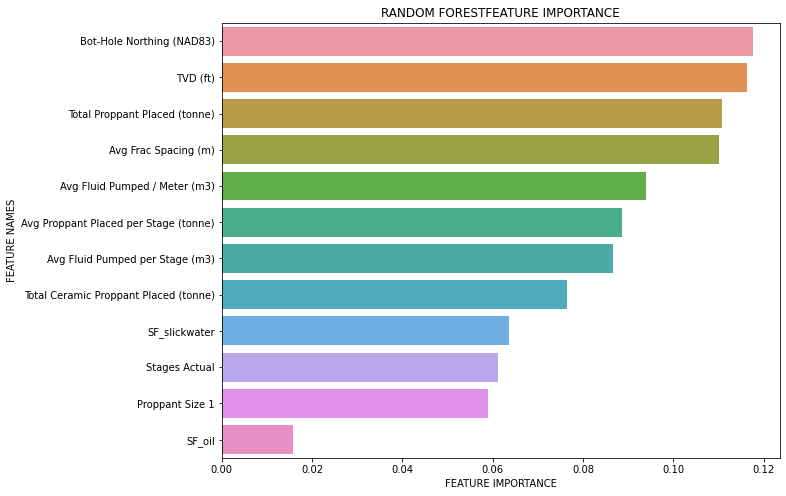

In [ ]:
plot_feature_importance(my_model1.feature_importances_,train_x.columns,'RANDOM FOREST')

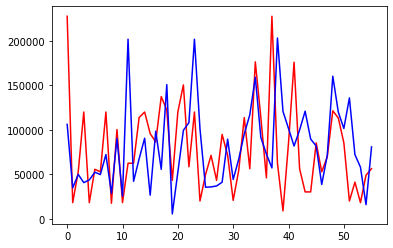

In [ ]:
y_pred = my_model1.predict(test_x)
index_list = np.arange(len(y_pred))
plt.plot(index_list, y_pred, '-', c='r', label = 'predict')
plt.plot(index_list, test_y, '-', c='b', label = 'real')

# **Log**

In [ ]:
log_list = []
for i in data1['Y_first6']:
  log_list.append(math.log(i))
X = data1[feature_columns]
y = log_list

In [ ]:
params = {
    'n_estimators': list(range(10, 40)),
    'learning_rate': np.arange(0.1, 0.4, 0.01)
}
reg_sMAPE = GridSearchCV(XGBRegressor(), param_grid=params, cv=5, scoring=make_scorer(expsMAPE, greater_is_better=False))
reg_sMAPE.fit(X, y)

[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]),
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29, 30, 31, 32, 33, 34, 35, 36,
                                          37, 38, 39]},
             scoring=make_scorer(expsMAPE, greater_is_better=False))

In [ ]:
reg_sMAPE.best_params_

{'learning_rate': 0.20999999999999996, 'n_estimators': 35}

In [ ]:
model2 = XGBRegressor(n_estimators = 35, learning_rate = 0.20999999999999996).fit(X, y)
y_pred = model2.predict(X)
print(sMAPE(y, y_pred, True))

[15:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
22.241163022951266


In [ ]:
print(reg_sMAPE.best_params_) 

{'learning_rate': 0.24999999999999992, 'n_estimators': 39}


In [ ]:
y_final = []
for i in y_pred:
  y_final.append(math.exp(i))

In [ ]:
print(y_final)

[75673.35561705596, 70173.74752725591, 92386.03215983848, 92386.03215983848, 64056.82529609406, 75673.35561705596, 148405.74278916104, 15219.342889836003, 67467.8013800365, 61977.56716439478, 30841.85454291635, 70173.74752725591, 72776.5758198172, 107548.39597921942, 70173.74752725591, 15138.106242294332, 42532.62447984456, 15219.342889836003, 53125.69117222928, 50619.072042072796, 54343.846283938845, 39520.005919066476, 68596.632658, 68596.632658, 35461.232460666484, 64433.81305339901, 53543.024942038144, 92386.03215983848, 92386.03215983848, 56383.394036647034, 92386.03215983848, 116565.90286909572, 67467.8013800365, 13168.605897803041, 75673.35561705596, 58244.08401292199, 42986.77400626704, 66716.69921820716, 53543.024942038144, 35461.232460666484, 42986.77400626704, 70173.74752725591, 53543.024942038144, 43379.985428897424, 56383.394036647034, 72889.23808895568, 118096.50319318501, 44609.14664054658, 143254.5432067162, 139999.05948177344, 35461.232460666484, 137402.17601514352, 68

# **With exam data**

In [ ]:
data2 = pd.read_csv('/gdrive/My Drive/DS_contest/examdata1.csv')

In [ ]:
data2 = data2.drop('No', axis = 1)
data2 = data2.drop('Unnamed: 0', axis = 1)

In [ ]:
log_list = []
X = data2[feature_columns]

In [ ]:
y_pred = model2.predict(X)

In [ ]:
len(y_pred)

15

In [ ]:
result = []
for i in y_pred:
  result.append(math.exp(i))

In [ ]:
Result = pd.DataFrame(result)

In [ ]:
Result.to_csv('/gdrive/My Drive/DS_contest/logxgboost_exam.csv')